## Appendix: Python Code

In [58]:
import warnings
import pandas as pd
import numpy as np
import cleaning_tools as ct
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/GoogleDrive/我的雲端硬碟/Python on cloud/FIM590-001/HW2/all_currencies.csv')
# df = pd.read_csv('C:/Users/jessi/Python/FIM590-001/HW2/all_currencies.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [4]:
# 887 coins
coinsAll = ct.unique(df['Symbol'])
# 1020 trading days
datesAll = ct.unique(df['Date'])

## Load Numpy Arrays with Prices and Caps

In [5]:
T=len(datesAll) # 1020 trading days
N=len(coinsAll) # 887 coins

timeCoins = np.zeros(N)
endDate = []
    
T = 1020 ### this is a good number to pick
Pall = np.zeros((N,T))*np.nan
CAPall = np.zeros((N,T))*np.nan

for i in range(N):
    ind_coin = np.where(df['Symbol']==coinsAll[i])[0] # find the all cover row number of each coin
    if len(ind_coin)>=T:
        dates=df['Date'][ind_coin[-T:]]
        dates=dates.reset_index()
        
        ##### make sure all time series start at same time
        #if dates['Date'][0][0:7] == '2015-12':  ## start Dec. 2015
        if dates['Date'][0] == '2015-12-13': ## start 13th Dec. 2015
            Pall[i,]=df['Close'][ind_coin[-T:]]
            CAPall[i,]=df['Market Cap'][ind_coin[-T:]]

## Clean the Data of Incomplete/Empty Rows

In [6]:
ind_complete_cases = np.where(ct.complete_cases(Pall))[0]
P = Pall[ind_complete_cases,:]
CAP = CAPall[ind_complete_cases,:]
coins = [coinsAll[i] for i in ind_complete_cases]

ind_complete_cases = np.where(ct.complete_cases(CAP))[0]
P = P[ind_complete_cases,:]
CAP = CAP[ind_complete_cases,:]
coins = [coins[i] for i in ind_complete_cases]

R = np.diff(P,axis=1)/P[:,0:-1]

N,T = R.shape

##  Principal Component Analysis

In [7]:
##### eigenportfolio estimation:
sigma = np.std(R,axis=1)

Rsort_norm = StandardScaler().fit_transform(R.T).T 
u,s,v = np.linalg.svd(Rsort_norm) # u is Unitary matrix; s is eigenvalues matrix; v is eigenvector matrix. RV=US


In [51]:
s**2/T

array([15.20584906,  2.1200872 ,  1.97917869,  1.76018088,  1.68140299,
        1.56576686,  1.52870628,  1.46632179,  1.44173348,  1.41328669,
        1.37655208,  1.3710361 ,  1.3588825 ,  1.33342294,  1.3157015 ,
        1.30430844,  1.2769411 ,  1.25688272,  1.24932958,  1.2283552 ,
        1.19413919,  1.17599926,  1.16465323,  1.14576725,  1.1369111 ,
        1.12445671,  1.11145334,  1.09344481,  1.08161892,  1.06003019,
        1.04200448,  1.03333575,  1.00872559,  1.00307765,  0.99107986,
        0.98623387,  0.96925957,  0.96229727,  0.94345022,  0.93408061,
        0.92440402,  0.90808119,  0.90231278,  0.88002486,  0.86799613,
        0.86316195,  0.85702163,  0.8410462 ,  0.83316311,  0.82847939,
        0.81545517,  0.80957434,  0.78975589,  0.78284198,  0.77460757,
        0.7654911 ,  0.75012842,  0.73159896,  0.72603234,  0.71801739,
        0.71576826,  0.69732082,  0.69326786,  0.68523478,  0.67854583,
        0.6681274 ,  0.65079044,  0.64132381,  0.63388641,  0.62

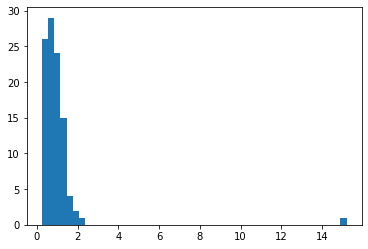

In [8]:
plt.hist(s**2/T,bins=50)
plt.show()

## Principal Eigenportfolio

In [9]:
c=np.dot(1/sigma,u[:,0]) # c is the product sum of 1/sigma & first eigenvector
pi=1/sigma*u[:,0]/c 
print(pi)

[ 7.47906980e-04  1.11784302e-02  3.23348342e-06  5.94667788e-03
  7.21129774e-03  8.76741285e-03  1.27133673e-02  7.13158902e-03
  4.46629694e-03  2.24281982e-02  7.31716940e-03  1.99750930e-03
  3.48174804e-04  4.12218100e-03  5.64529918e-02  4.68265918e-03
  2.25288481e-02  2.25784610e-05  1.49376256e-02  1.10212252e-02
  8.05742358e-03  4.81716946e-03  2.56471935e-02  4.35866753e-03
  7.50768613e-03  6.77744109e-03  2.50493827e-02  2.76237809e-03
  1.18395118e-02  3.00891577e-03  1.65227294e-02  2.69277785e-02
  3.59208698e-03  1.25709629e-02  1.23349439e-02  7.36215197e-03
  1.08299135e-02  2.44393601e-02  3.12003908e-04  6.74342758e-03
  1.53396339e-02  1.43837012e-03  1.21718911e-02  9.79321293e-03
  1.67155613e-02  3.92624204e-03  1.45803904e-02  4.86993084e-03
  3.72638971e-03  5.58887421e-03  8.24071390e-04  1.45246009e-02
  2.96855490e-02  2.45786896e-03  1.16305624e-02  1.70171322e-03
  2.91795750e-03  2.96063315e-03  1.19328960e-02  1.51059735e-02
  4.58084166e-03  1.47165

In [10]:
rank = np.argsort(-pi) # from big to small
pi_sorted=pi[rank]

In [11]:
mean_CAP=np.mean(CAP,axis=1)
cap_rank=np.argsort(-mean_CAP) # from big to small

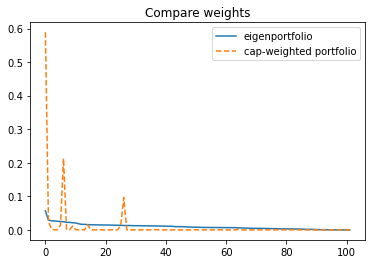

In [12]:
plt.plot(pi_sorted,label='eigenportfolio')
plt.plot(mean_CAP[rank]/np.sum(mean_CAP),linestyle='--',label='cap-weighted portfolio')
plt.title('Compare weights')
plt.legend()
plt.show()

/var/folders/5q/ht1339qj6fd2nxwc37wh01s40000gn/T/ipykernel_2629/2675547213.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(pi_sorted),label='eigenportfolio')


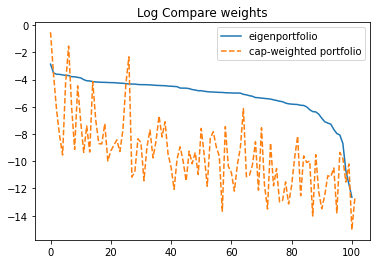

In [13]:
plt.plot(np.log(pi_sorted),label='eigenportfolio')
plt.plot(np.log(mean_CAP[rank]/np.sum(mean_CAP)),linestyle='--',label='cap-weighted portfolio')
plt.title('Log Compare weights')
plt.legend()
plt.show()

In [14]:
cryptocurrencies=[coins[i] for i in rank]
col1=pd.Series(cryptocurrencies,name='symbol')
col2=pd.Series(pi_sorted,name='eigenportfolio_weight')
col3=pd.Series(range(1,103),name='eigenportfolio_rank')
col4=pd.Series(mean_CAP[rank],name='capitalization')
output=pd.concat([col1,col2,col3,col4],axis=1)
pd.set_option('display.max_rows',None)
output

,symbol,eigenportfolio_weight,eigenportfolio_rank,capitalization
0,BTC,5.645299e-02,1,6.478321e+10
1,LTC,2.968555e-02,2,2.917656e+09
2,DOGE,2.692778e-02,3,2.133390e+08
3,PPC,2.673202e-02,4,3.279894e+07
4,CLAM,2.564719e-02,5,7.899399e+06
5,DASH,2.504938e-02,6,1.564551e+09
6,ETH,2.443936e-02,7,2.343666e+10
7,BTS,2.252885e-02,8,2.616549e+08
8,BLK,2.242820e-02,9,1.194293e+07
9,XMR,2.143350e-02,10,1.262994e+09


In [15]:
# Top 6 cryptocurrencies in eigenportfolio

print('\nTop 6 coins in this eigenportfolio are: {}'.format(list(output.iloc[0:6,0])))


Top 6 coins in this eigenportfolio are: ['BTC', 'LTC', 'DOGE', 'PPC', 'CLAM', 'DASH']


## Compute Cap-Weighted Portfolio

In [16]:
cap_weight=np.zeros((N,T))
Rcap=np.zeros(T)
Index_Rcap=np.ones(T+1)*100
for i in range(T):
    cap_weight[:,i]=CAP[:,i]/np.sum(CAP[:,i])
    Rcap[i]=np.sum(cap_weight[:,i]*R[:,i])
    Index_Rcap[i+1]=Index_Rcap[i]*(1+Rcap[i])

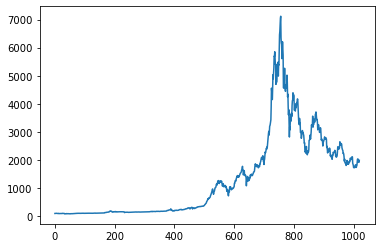

In [17]:
plt.plot(Index_Rcap)

## Check for Co-Integration

In [20]:
import statsmodels
import statsmodels.api as stat
import statsmodels.tsa.stattools as ts

In [21]:
def ADF(N,start_time,end_time):
    constant=np.ones(end_time-start_time)
    t=np.arange(0,end_time-start_time)
    X=np.array([constant,t,np.log(Index_Rcap[start_time:end_time])]).T
    Z=np.zeros((N,end_time-start_time))
    Pvalue_ADF=np.zeros(N)
    alpha=np.zeros(N) # coefficient of t
    beta=np.zeros(N) # coefficient of log price of market portfolio
    for i in range(N):
        Reg=stat.OLS(np.log(P[i,start_time:end_time]),X).fit()
        alpha[i]=Reg.params[1]
        beta[i]=Reg.params[2]
        Z[i,:]=Reg.resid
        ADF=ts.adfuller(Z[i,:],regression='ct') # The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.
        # In ADF: 1.t-value 2.P-value 3.lag 4.test time 5.CI
        Pvalue_ADF[i]=ADF[1] # if P-value>0.01, can't reject null hypothesis,it is random walk or trend;Otherwise, reject null hypothesis,it is mean-reverted
    return Z,Pvalue_ADF,alpha,beta

In [22]:
Z,Pvalue_ADF,alpha,beta = ADF(N,0,T+1) # P-value

In [23]:
Pvalue_ADF

array([5.60708838e-01, 8.64068818e-02, 1.23823231e-01, 5.52784776e-04,
       4.07973073e-01, 2.01303499e-01, 1.00151220e-01, 1.21707515e-01,
       6.74493880e-03, 1.65379068e-01, 1.20222708e-01, 1.16501791e-01,
       1.61678424e-02, 1.56206712e-01, 1.72785011e-01, 1.35573747e-01,
       3.76809358e-01, 1.50237554e-01, 1.38202342e-01, 7.64447318e-03,
       4.92414769e-03, 6.12814574e-02, 5.65295487e-02, 3.33560506e-02,
       1.81183217e-01, 2.52070151e-01, 2.48452989e-01, 1.84643506e-01,
       2.60792630e-01, 2.17974070e-01, 4.46163092e-02, 5.12978373e-01,
       8.93685703e-02, 8.09650205e-03, 1.07560500e-01, 1.79390157e-02,
       5.24499848e-01, 4.07936962e-03, 1.38388637e-03, 3.36669531e-02,
       2.49183218e-05, 6.27832559e-02, 1.52787854e-01, 7.70643394e-02,
       7.73695307e-01, 2.60741305e-01, 2.10964674e-02, 2.36109813e-02,
       1.43324164e-02, 5.68637157e-01, 3.36546604e-03, 6.24941714e-01,
       5.79348044e-02, 1.67118662e-01, 3.18159182e-01, 6.91123326e-01,
      

In [24]:
print('\nThere are {} coins over {} have an ADF p-value that is less than .01'.format(np.sum([Pvalue_ADF<0.01]),N))


There are 11 coins over 102 have an ADF p-value that is less than .01


## PLOT THE TIME SERIES of CO-INTEGRATED RESIDUALS

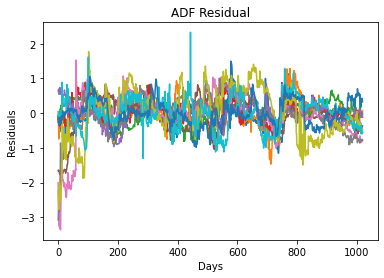

In [25]:
target_coins=np.where(Pvalue_ADF<0.01)[0]
plt.plot(Z[target_coins,:].T)
plt.xlabel('Days')
plt.ylabel('Residuals')
plt.title('ADF Residual')
plt.show()

In [26]:
def FindTau(target_coins,Z):
    theta=np.zeros(len(target_coins))
    kappa=np.zeros(len(target_coins))
    sigma=np.zeros(len(target_coins))
    for i in range(len(target_coins)):
        theta[i]=np.mean(Z[target_coins[i],:]) # mean-reversion
        #kappa[i]=-np.log(np.corrcoef(Z[target_coins[i],1:],Z[target_coins[i],0:-1])[1,0])*252 # compare Zt and Zt-1 find corr.
        kappa[i]=(1-np.sum((Z[target_coins[i],1:]-theta[i])*(Z[target_coins[i],:-1]-theta[i]))/(np.sum((Z[target_coins[i],:-1]-theta[i])**2)))*252
        sigma[i]=np.std(Z[target_coins[i],:])
    Tau=252/kappa
    return Tau,sigma

In [27]:
target_coins=np.where(Pvalue_ADF<0.01)[0]
Tau,sigma = FindTau(target_coins,Z)

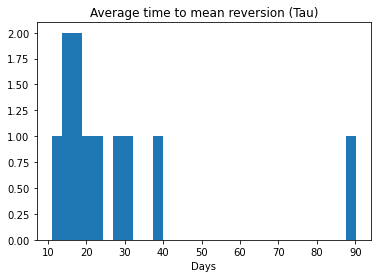

In [28]:
plt.hist(Tau,bins=30)
plt.xlabel('Days')
plt.title('Average time to mean reversion (Tau)')
plt.show()

In [57]:
Tau

array([14.4246629 , 15.72974544, 22.58506098, 16.3755668 , 17.83826463,
       90.21168633, 38.44666917, 32.05869644, 19.29971264, 11.01360976,
       27.96021562])

In [56]:
mean_CAP[target_coins]

array([1.60480933e+06, 1.49912492e+05, 6.36565706e+05, 1.89206285e+06,
       1.19705910e+06, 2.34366617e+10, 9.51144737e+06, 1.02786153e+08,
       4.16402375e+05, 8.96065961e+04, 1.55760376e+06])

In [29]:
index=np.where(Tau<=24)[0] # Average time to mean reversion (Tau) faster than 24 Days would be good!
coins_cointegrated=[coins[i] for i in target_coins[index]]
Tau_target=[round(Tau[i],2) for i in index]
sigma_target=[round(np.sqrt(2*Tau[i]/T),2) for i in index]
# sigma_target can be improved!
cap_target=[mean_CAP[i] for i in target_coins[index]]
col1=pd.Series(coins_cointegrated,name='symbol')
col2=pd.Series(Tau_target,name='Tau')
col3=pd.Series(sigma_target,name='Std(Tau)')
col4=pd.Series(cap_target,name='capitalization')
output=pd.concat([col1,col2,col3,col4],axis=1)
pd.set_option('display.max_rows',None)
output

,symbol,Tau,Std(Tau),capitalization
0,ADC,14.42,0.17,1.604809e+06
1,BLC,15.73,0.18,1.499125e+05
2,BYC,22.59,0.21,6.365657e+05
3,CANN,16.38,0.18,1.892063e+06
4,EFL,17.84,0.19,1.197059e+06
5,INFX,19.30,0.19,4.164024e+05
6,PXI,11.01,0.15,8.960660e+04


## Back-Testing a Trading Signal

In [30]:
from scipy import optimize
def pairtrading(sliding_window,training_window,TC):
    Time_period=np.arange(training_window,T,sliding_window)
    W=np.zeros(len(Time_period)+1)
    W[0]=100
    count=0
    ret_window = np.zeros((len(Time_period),sliding_window))

    for t0 in Time_period:
        # ADF
        Z,Pvalue_ADF,alpha,beta = ADF(N,t0-training_window,t0) # P-value
        
        # OU process parameters:
        target_coins=np.where(Pvalue_ADF<0.01)[0] 
        Tau,sigma = FindTau(target_coins,Z)
        index=np.where(Tau<=24)[0] # Average time to mean reversion (Tau) faster than 24 Days would be good!
        
        # # Out of sample:

        if len(index)>1:
            Z_out=Z[target_coins[index],-1] # Use last of Z in windows to determine buy/sell
            sign_q=np.zeros(len(Z_out))
            ind_q_minus1=np.where((Z_out-np.mean(Z[target_coins[index],:-1],axis=1))/sigma[index]>1.2) 
            ind_q_plus1=np.where((Z_out-np.mean(Z[target_coins[index],:-1],axis=1))/sigma[index]<-1.2)
            sign_q[ind_q_minus1]=-1
            sign_q[ind_q_plus1]=1
            W[count+1]=W[count]
            sign_q1=sign_q ###
            # print('\n{}.'.format(count+1))
            # print('\nTime period is from {} to {}'.format((t0-training_window),t0))
            # print('\nW is {}'.format(W[count]))
            # print('\nThere are {} coins over {} have an PP p-value that is less than .01'.format(len(target_coins),N))

            j=0
            # all_sign=np.zeros((len(range(t0,min(t0+sliding_window,T))),len(sign_q))) ## trading_counts
            for t in range(t0,min(t0+sliding_window,T)):
                A = np.ones((3,len(index)))
                b = np.zeros(3)
                A[0,:]=beta[target_coins[index]]*sign_q # market neutral
                # This beta is a bit of incorrect
                A[1,:]=sign_q # dollar-neutral
                b[2] = min(W[count+1],10000) # leverage 
                res=optimize.linprog(-np.abs(Z_out),\
                                    A_eq=A,b_eq=b,options={'maxiter': 4})
                q=sign_q*res.x 

                #compute return
                dlogP=np.log(P[target_coins[index],t+1]/P[target_coins[index],t])
                dlogPm=np.log(Index_Rcap[t+1]/Index_Rcap[t])
                dP_over_P=(P[target_coins[index],t+1]/P[target_coins[index],t])-1
                dPm_over_Pm=(Index_Rcap[t+1]/Index_Rcap[t])-1

                if t==t0: # Considering first-building transaction fee
                    W[count+1]+= np.sum(q*dP_over_P)-np.sum(np.abs(q-0)*TC) # value
                else:
                    W[count+1]+= np.sum(q*dP_over_P) # value
                
                ret_window[np.where(Time_period==t0)[0][0],j] = (W[count+1]/W[count])-1 # return

                # exit conditions
                dZ=dlogP-alpha[target_coins[index]]-beta[target_coins[index]]*dlogPm
                Z_out+=dZ
                # all_sign[np.where(np.arange(t0,min(t0+sliding_window,T))==t)[0][0],:]=sign_q ## trading_counts
                exit_sign=np.where(np.abs((Z_out-np.mean(Z[target_coins[index],:-1],axis=1))/sigma[index])<0.5)[0]
                ADJ=-np.sum(np.abs(q[exit_sign]-0)*TC) ##
                W[count+1]+=ADJ ##
                q[exit_sign]=0
                sign_q=np.sign(q)
                j+=1
            count+=1
    return W,ret_window

In [31]:
def CumRet_chart(sliding_window,training_window,W):
    t = np.arange(training_window,T,sliding_window)
    t = np.append(t,min(T,t[-1]+sliding_window))
    plt.plot(t,W,label='W')
    plt.legend()
    plt.title('Pair Portfolio Value')
    locs, label=plt.xticks() # Get the current locations and labels
    t_sub=np.arange(t[0],t[-1], step=len(t))
    plt.xticks(t_sub,dates['Date'][t_sub],rotation=90) # Set text labels and properties
    plt.show()

In [32]:
def annualized_profit_chart(sliding_window,W):
    # calculate return for each window
    Ret=np.zeros(len(W)-1)
    for i in range(len(W)-1):
        Ret[i]=W[i+1]/W[i]-1
    Annualized_Ret=Ret*252/sliding_window
    plt.hist(Annualized_Ret,label='Annualized Return')
    plt.legend()
    plt.title('Histogram of Profit(Annualized Return)')
    plt.xlabel('\nAnnualized Return\n', fontsize = 10)
    plt.ylabel('\nFrequency\n', fontsize = 10 )
    plt.show()
    return Ret,Annualized_Ret

In [34]:
def sharpe_ratio(sliding_window,Ret,ret_window):
    # calculate sharpe ratio for each window
    annual_rf_rate = 0.02
    sharpe_ratio=np.zeros(len(Ret))
    for i in range(len(Ret)):
        index=np.where(ret_window[i,:]!=0)[0]
        std=np.std(ret_window[i,:][index])
        if std!=0:
            #sharpe_ratio[i]=((Ret[i]/sliding_window)-(annual_rf_rate/252))/std
            sharpe_ratio[i]=(Ret[i]/sliding_window)/std
        else:
            sharpe_ratio[i]=np.nan
    plt.hist(sharpe_ratio,label='Sharpe Ratio')
    plt.legend()
    plt.title('Histogram of Sharpe Ratio')
    plt.xlabel('\nSharpe Ratio\n', fontsize = 10)
    plt.ylabel('\nFrequency\n', fontsize = 10 )
    plt.show()
    return sharpe_ratio

In [ ]:
# Problem 3 - Results:

In [49]:
W1,ret_window1 = pairtrading(20,60,0)
W1

array([ 100.        ,  100.00756416,  100.44918787,  113.64280974,
        113.64282263,  113.64544357,  144.46305821,  144.46343167,
        144.44840687,  144.44854938,  144.44854938,  144.44784157,
        144.45087732,  144.44698517,  174.11986496,  294.45186989,
        330.6774484 ,  332.07616813,  332.07382832,  332.04647309,
        332.0465346 ,  332.04654186,  332.04654914,  332.04654914,
        332.04657306,  332.04663805,  332.04673379,  332.04638555,
        332.04311363,  380.51174063,  380.51174063,  448.99658006,
        448.58147838,  766.67795067,  766.67795119,  706.66862397,
        706.6572491 ,  706.6572491 ,  706.65704055,  749.94329932,
        749.94329629,  964.47208249, 1294.24789664, 1416.22828142,
       1416.09555779, 1416.06407809, 1416.12292532, 1427.38168742,
       1427.38168765])

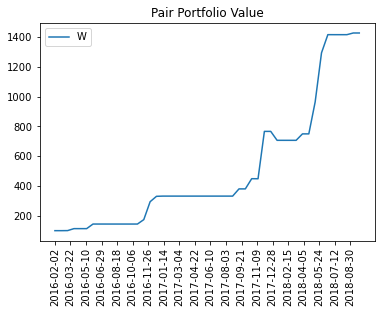

In [50]:
CumRet_chart(20,60,W1)

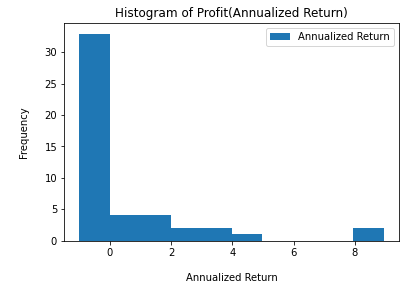

array([ 9.53084750e-04,  5.56403781e-02,  1.65496247e+00,  1.42846109e-06,
        2.90594083e-04,  3.41678410e+00,  3.25730478e-05, -1.31045238e-03,
        1.24301286e-05,  0.00000000e+00, -6.17406354e-05,  2.64804583e-04,
       -3.39499930e-04,  2.58834260e+00,  8.70769836e+00,  1.55014227e+00,
        5.32962520e-02, -8.87796904e-05, -1.03794960e-03,  2.33401243e-06,
        2.75407497e-07,  2.76341040e-07,  0.00000000e+00,  9.07878784e-07,
        2.46595551e-06,  3.63284241e-06, -1.32142199e-05, -1.24158203e-04,
        1.83923315e+00,  0.00000000e+00,  2.26775914e+00, -1.16488218e-02,
        8.93486634e+00,  8.48200870e-09, -9.86225731e-01, -2.02815648e-04,
        0.00000000e+00, -3.71847539e-06,  7.71812675e-01, -5.08949716e-08,
        3.60435612e+00,  4.30823798e+00,  1.18752586e+00, -1.18082497e-03,
       -2.80097085e-04,  5.23616912e-04,  1.00175204e-01,  2.00617722e-09])

In [36]:
Ret1,Annualized_Ret1=annualized_profit_chart(20,W1)
Annualized_Ret1

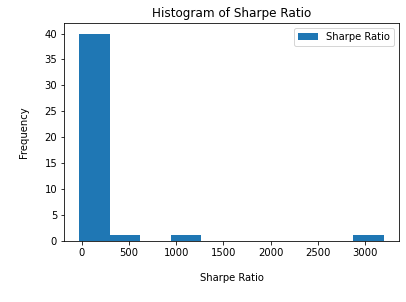

array([ 1.09255363e-01,  1.24367388e-01,  1.02040923e-01,  2.46654223e-02,
        1.05335135e-01,  1.12366463e-01,  9.04195499e-02, -2.83480483e-01,
        7.03096391e-02,             nan, -9.72106262e-02,  1.33300864e-01,
       -1.17527518e-01,  4.03746893e+01,  2.25054344e-01,  1.14208418e-01,
        4.10202347e+01, -1.10559829e-01, -3.25691030e-01,  1.16908886e-01,
        1.15513598e-01,  6.84065011e-01,             nan,  1.16740942e-01,
        1.65641380e-01,  1.82893861e-01, -7.91165622e-02, -1.66667474e-01,
        1.23023313e+03,             nan,  1.08652993e-01, -2.82017861e+01,
        1.95574478e+02,             nan, -1.73262840e-01, -2.60974834e-01,
                   nan, -2.27444053e-01,  3.19897800e+03, -1.07277737e+00,
        7.48801132e-01,  1.22334052e-01,  4.84131980e+02, -1.48410675e+00,
       -3.28705386e-01,  1.11464406e-01,  4.73706373e-01,  3.90616126e-01])

In [59]:
sharpe_ratio1 = sharpe_ratio(20,Ret1,ret_window1)
sharpe_ratio1

In [48]:
# 5bps, 1bps = 0.01%
W2,ret_window2 = pairtrading(20,60,0.0005)
W2

array([ 100.        ,  100.00755954,  100.44918285,  113.64280267,
        113.64281555,  113.64543433,  144.38449943,  144.38487136,
        144.36980712,  144.36994924,  144.36994924,  144.36923124,
        144.37226255,  144.36837902,  173.99706564,  294.24416887,
        330.4385483 ,  331.81551993,  331.81318062,  331.78599191,
        331.7860533 ,  331.78606055,  331.78606543,  331.78606543,
        331.78608925,  331.7861541 ,  331.78624967,  331.78590066,
        331.78262921,  380.07613381,  380.07613381,  448.48680474,
        448.07178007,  765.49958532,  765.49958583,  705.52240676,
        705.51067672,  705.51067672,  705.51046803,  748.20753532,
        748.2075298 ,  962.35458366, 1290.52558379, 1411.52044429,
       1411.38747594, 1411.35564047, 1411.41432402, 1422.47458523,
       1422.47458545])

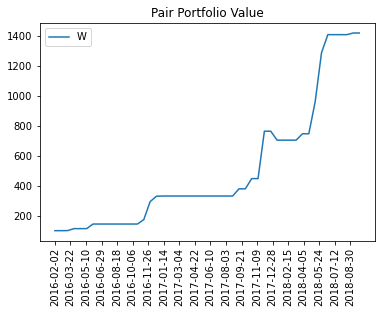

In [46]:
CumRet_chart(20,60,W2)

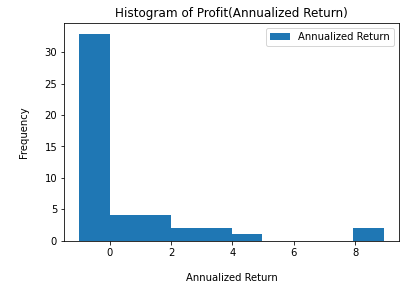

array([ 9.52502371e-04,  5.56403304e-02,  1.65496229e+00,  1.42844992e-06,
        2.90353198e-04,  3.40807550e+00,  3.24571493e-05, -1.31460775e-03,
        1.24039442e-05,  0.00000000e+00, -6.26641208e-05,  2.64561541e-04,
       -3.38933129e-04,  2.58589487e+00,  8.70769570e+00,  1.54990049e+00,
        5.25055041e-02, -8.88302221e-05, -1.03244170e-03,  2.33131187e-06,
        2.75277507e-07,  1.85435051e-07,  0.00000000e+00,  9.04769824e-07,
        2.46263471e-06,  3.62951667e-06, -1.32541085e-05, -1.24237769e-04,
        1.83402657e+00,  0.00000000e+00,  2.26789945e+00, -1.16598990e-02,
        8.92622683e+00,  8.44515378e-09, -9.87214716e-01, -2.09488076e-04,
        0.00000000e+00, -3.72699695e-06,  7.62544388e-01, -9.29616891e-08,
        3.60628939e+00,  4.29670588e+00,  1.18132896e+00, -1.18694790e-03,
       -2.84207434e-04,  5.23902465e-04,  9.87373366e-02,  1.99324597e-09])

In [47]:
Ret2,Annualized_Ret2=annualized_profit_chart(20,W2)
Annualized_Ret2

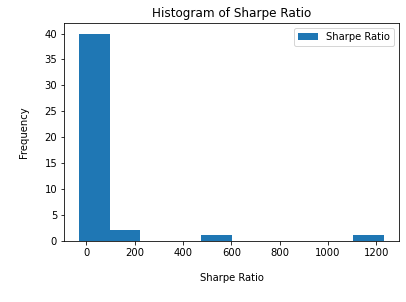

array([ 1.09249730e-01,  1.24367282e-01,  1.02040916e-01,  2.46652314e-02,
        1.05296930e-01,  1.12149030e-01,  9.03498568e-02, -2.85213206e-01,
        7.02625463e-02,             nan, -9.87668061e-02,  1.33349250e-01,
       -1.17545861e-01,  4.03862264e+01,  2.25054940e-01,  1.14201796e-01,
        4.24119338e+01, -1.10574205e-01, -3.25076276e-01,  1.16905350e-01,
        1.15511848e-01,  4.94995934e-01,             nan,  1.16737907e-01,
        1.65638703e-01,  1.82874580e-01, -7.93040868e-02, -1.66667485e-01,
        1.23018149e+03,             nan,  1.08652062e-01, -2.83877796e+01,
        2.08977275e+02,  1.68532572e+02, -1.73527753e-01, -2.72083617e-01,
                   nan, -2.27514635e-01,  4.79411320e+01, -1.96264168e+00,
        7.50044827e-01,  1.22173744e-01,  4.83622143e+02, -1.50585298e+00,
       -3.31279373e-01,  1.11286781e-01,  4.66867754e-01,  3.90645124e-01])

In [60]:
sharpe_ratio2 = sharpe_ratio(20,Ret2,ret_window2)
sharpe_ratio2

In [42]:
# 15bps, 1bps = 0.01%
W3,ret_window3 = pairtrading(20,60,0.0015)
W3

array([ 100.        ,  100.0075503 ,  100.44917281,  113.64278853,
        113.64280141,  113.64541584,  144.22725948,  144.22762835,
        144.21248541,  144.21262678,  144.21262678,  144.21188853,
        144.21491154,  144.21104523,  173.75139976,  293.82865533,
        329.96066712,  331.29838647,  331.29604817,  331.26919466,
        331.26925581,  331.26926304,  331.26926312,  331.26926312,
        331.26928675,  331.26935132,  331.26944657,  331.26909602,
        331.26582551,  379.21009443,  379.21009443,  447.4733173 ,
        447.05844624,  763.1552866 ,  763.1552871 ,  703.24187797,
        703.22944002,  703.22944002,  703.22923106,  744.75392535,
        744.75391483,  958.14157481, 1283.1191831 , 1402.15740575,
       1402.02398313, 1401.99139634, 1402.04975465, 1412.71663179,
       1412.71663201])

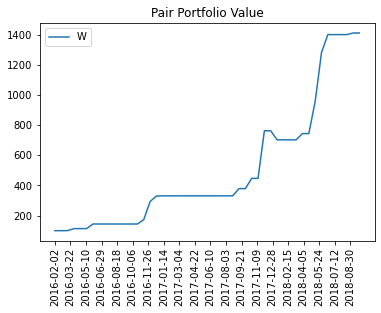

In [43]:
CumRet_chart(20,60,W3)

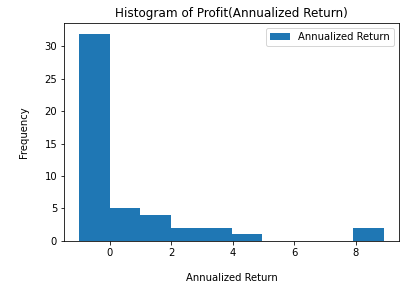

array([ 9.51337614e-04,  5.56402352e-02,  1.65496194e+00,  1.42842756e-06,
        2.89871429e-04,  3.39064473e+00,  3.22256303e-05, -1.32291596e-03,
        1.23515325e-05,  0.00000000e+00, -6.45015127e-05,  2.64124215e-04,
       -3.37797994e-04,  2.58099833e+00,  8.70769054e+00,  1.54941780e+00,
        5.10826454e-02, -8.89306415e-05, -1.02130474e-03,  2.32594492e-06,
        2.75018457e-07,  3.15729962e-09,  0.00000000e+00,  8.98611169e-07,
        2.45604035e-06,  3.62291767e-06, -1.33332947e-05, -1.24395588e-04,
        1.82360431e+00,  0.00000000e+00,  2.26817962e+00, -1.16819823e-02,
        8.90894741e+00,  8.37145513e-09, -9.89194425e-01, -2.22851027e-04,
        0.00000000e+00, -3.74402064e-06,  7.44012230e-01, -1.77941286e-07,
        3.61016500e+00,  4.27360421e+00,  1.16893397e+00, -1.19895599e-03,
       -2.92857700e-04,  5.24478779e-04,  9.58615423e-02,  1.96675956e-09])

In [44]:
Ret3,Annualized_Ret3=annualized_profit_chart(20,W3)
Annualized_Ret3

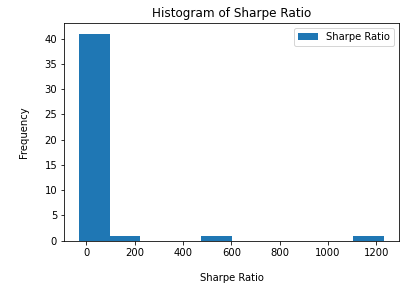

array([ 1.09238419e-01,  1.24367071e-01,  1.02040903e-01,  2.46648495e-02,
        1.05220332e-01,  1.11713107e-01,  9.02092104e-02, -2.88706209e-01,
        7.01679370e-02,             nan, -1.01874128e-01,  1.33459890e-01,
       -1.17582458e-01,  4.04103928e+01,  2.25056138e-01,  1.14188587e-01,
        2.51564001e+01, -1.10602892e-01, -3.23765684e-01,  1.16898270e-01,
        1.15508346e-01,  1.00046225e-02,             nan,  1.16731757e-01,
        1.65633347e-01,  1.82835637e-01, -7.96757027e-02, -1.66667505e-01,
        1.23002017e+03,             nan,  1.08650220e-01, -2.87625944e+01,
        2.01904445e+02,  5.57143958e+01, -1.74058437e-01, -2.94893502e-01,
                   nan, -2.27655279e-01,  1.55872240e+01, -3.76896689e+00,
        7.52560082e-01,  1.21851089e-01,  4.82593542e+02, -1.54994157e+00,
       -3.35745811e-01,  1.10935103e-01,  4.53203769e-01,  3.90577595e-01])

In [61]:
sharpe_ratio3 = sharpe_ratio(20,Ret3,ret_window3)
sharpe_ratio3